# Zachary's karate club

In this example, we used the ELK on the Zachary's karate club. We will compare the difference between the nodal hierarchies using the Tanimoto coefficient, as prescribed in the original link community algorithm.

In [1]:
T = True
F = False
import networkx as nx
from modules.main import ELK
from networks.toy import TOY
from plotting_jupyter.plotting_H import Plot_H
from modules.colregion import colregion
from various.network_tools import *

In [2]:
G = nx.karate_club_graph()

nodes = 34
A = np.zeros((34, 34))
for u, v in G.edges:
    A[u, v] = 1
    A[v, u] = 1

linkage = "single"
lookup = F
cut = F
mode = "ZERO"
topology = "MIX"
index = "H2"
score = "_D"

properties = {
  "structure" : "Zachary",
  "lookup" : lookup,
  "cut" : cut,
  "topology" : topology,
  'index' : index
}

In [3]:
NET = TOY(A, **properties)
NET.set_labels(np.arange(nodes))
H = ELK(A, nodes, linkage, mode, undirected=T, **properties)
# # Compute quality functions ----
H.compute_H_features_cpp()
## Compute link entropy ----
H.link_entropy_cpp("short", cut=cut)
## Compute la arbre de merde ----
H.la_abre_a_merde_cpp()
## Compute node entropy ----
H.node_entropy_cpp("short", cut=cut)
# Set labels to network ----
L = colregion(NET)
L.get_regions()
H.set_colregion(L)

Compute link hierarchical agglomeration ----
	> Compute features

	link entropy :  Sh : 0.2779, and Sv : 0.7221


	link entropy H: Sh : 0.2531, and Sv : 0.7469

	> Compute the node hierarchy ----
Starting Z2dict
25%
50%
75%

	Node entropy :  Sh : 0.2332, and Sv : 0.7668


	Node entropy H: Sh : 0.1792, and Sv : 0.8208

Level information
Vertex entropy
Vertex entropy H
Level entropy
Level entropy H
Number of vertices in the tree: 155
Commencer: la abre a merde
Voila, bon ami
Starting Z2dict
Level information
Vertex entropy
Vertex entropy H
Level entropy
Level entropy H
Number of vertices in the tree: 67


	> Plot D as a function of K
Visualize nodal dendrogram!!!


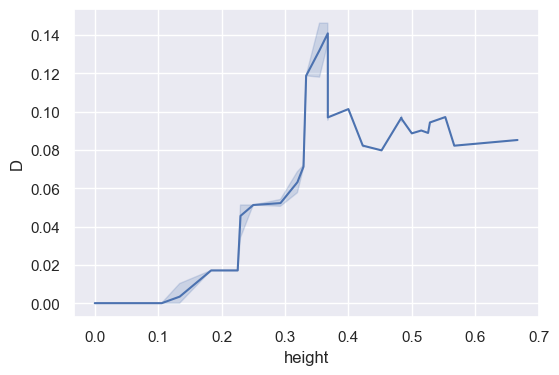

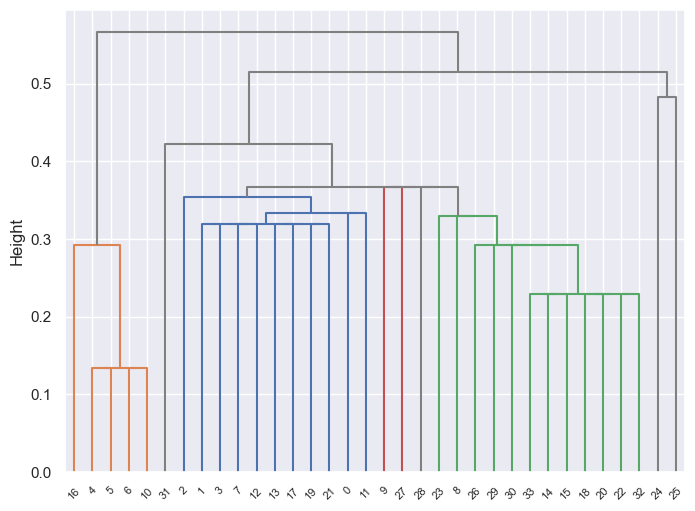

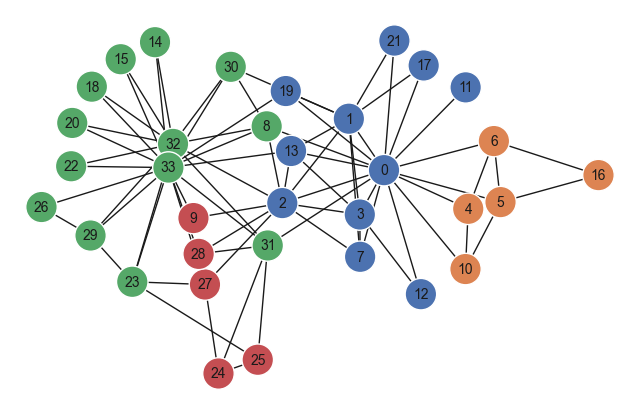

In [4]:
plot_h = Plot_H(H)
k, r = get_best_kr_equivalence(score, H)
rlabels = get_labels_from_Z(H.Z, r)
rlabels = skim_partition(rlabels)
_, noc_covers, noc_sizes, rlabels2 = H.discovery(rlabels, direction="both", undirected=T)
plot_h.plotD(width=6, height=4)
plot_h.nodal_dendrogram(r, cmap_name="deep", width=8, height=6)
plot_h.plot_network_kk(
  NET.A, rlabels2, noc_covers, noc_sizes,
  ang=80, font_size=10, undirected=T, width=8, height=6,
  cmap_name="deep"
)